In [2]:
%run ./PM_functions_Units.ipynb

## Test-body limit with eccentricity

### Varying mass and eccentricity parameter α

In [28]:
m_1 = b1_mass = 1e-4
m_2 = b2_mass = 1

# R_S = 2*(b1_mass + b2_mass)*G/c**2
R_S = 2*(b1_mass + b2_mass)

mass_bin = b1_mass + b2_mass
SMA_bin = 1000


α = 0.5
v_redmass = α*np.sqrt(mass_bin/SMA_bin)
x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])
x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin,  0])
v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])
v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])

s = x_1, x_2, v_1, v_2, m_1, m_2

N =  α*6# Number of "years" we want

t_max = 2*np.pi*np.sqrt(SMA_bin**3/(mass_bin))*N
res = 7e4
dt = t_max/res

positions_N = run_model(s, t_max, dt, DL = True, mode = 'N')
positions_EIH = run_model(s, t_max, dt, DL = True, mode = 'EIH')
positions_1PM = run_model(s, t_max, dt, DL = True, mode = '1PM')
positions_2PM = run_model(s, t_max, dt, DL = True, mode = '2PM')
# print(positions[2])

#~1 min at res=1e5 STABILIZED
#~10 min at res=1e6

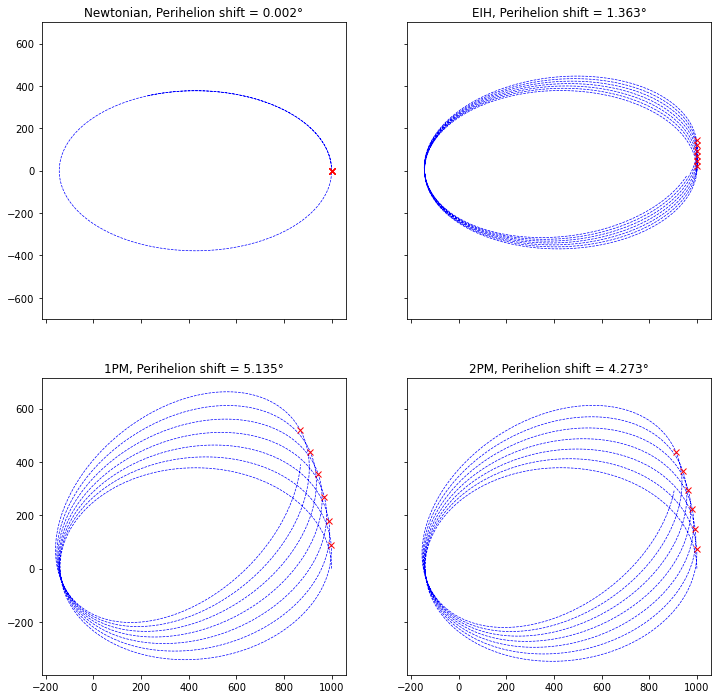

In [29]:
rs_N, peakPositions_N, peakAngles_N, perihelionShift_N = perihelionShift(positions_N[0]) 
rs_EIH, peakPositions_EIH, peakAngles_EIH, perihelionShift_EIH = perihelionShift(positions_EIH[0]) 
rs_1PM, peakPositions_1PM, peakAngles_1PM, perihelionShift_1PM = perihelionShift(positions_1PM[0])    
rs_2PM, peakPositions_2PM, peakAngles_2PM, perihelionShift_2PM = perihelionShift(positions_2PM[0])


fig, axs = plt.subplots(2,2, figsize=(12,12), sharex = True, sharey = 'row')

axs[0,0].plot(positions_N[0,0][0:14300], positions_N[0,1][0:14300], 'b--', lw=0.7)
axs[0,0].set_title(f'Newtonian, Perihelion shift = {perihelionShift_N*180/np.pi:.3f}°')
axs[0,0].set_ylim(-700, 700)

axs[0,1].plot(positions_EIH[0,0], positions_EIH[0,1], 'b--', lw=0.7)
axs[0,1].set_title(f'EIH, Perihelion shift = {perihelionShift_EIH*180/np.pi:.3f}°')
# axs[0,0].setp(ax, ylim=ax[0,0].get_ylim())

axs[1,0].plot(positions_1PM[0,0], positions_1PM[0,1], 'b--', lw=0.7)
axs[1,0].set_title(f'1PM, Perihelion shift = {perihelionShift_1PM*180/np.pi:.3f}°')

axs[1,1].plot(positions_2PM[0,0], positions_2PM[0,1], 'b--', lw=0.7)
axs[1,1].set_title(f'2PM, Perihelion shift = {perihelionShift_2PM*180/np.pi:.3f}°')

for i in range(len(peakPositions_EIH)):
    axs[0,0].plot(peakPositions_N[i,0], peakPositions_N[i,1], 'rx')
    axs[0,1].plot(peakPositions_EIH[i,0], peakPositions_EIH[i,1], 'rx')
    axs[1,0].plot(peakPositions_1PM[i,0], peakPositions_1PM[i,1], 'rx')
    axs[1,1].plot(peakPositions_2PM[i,0], peakPositions_2PM[i,1], 'rx')
# print(f'The perihelionShift in the three cases are (N:) {perihelionShift_N*180/np.pi:.3f}°, (EIH:) {perihelionShift_EIH*180/np.pi:.3f}°, (1PM): {perihelionShift_1PM*180/np.pi:.3f}°, (2PM): {perihelionShift_2PM*180/np.pi:.3f}°')
# fig.tight_layout()
# fig.savefig('test body perihelion shift.jpg', dpi=600)

    
    

In [ ]:
m_1 = b1_mass = np.array([1e-7, 1e-6, 1e-6, 1e-4, 1e-3])
m_2 = b2_mass = np.array([1, 1, 1, 1, 1])

# R_S = 2*(b1_mass + b2_mass)*G/c**2
R_S = 2*(b1_mass + b2_mass)

mass_bin = b1_mass + b2_mass
SMA_bin = 1000


α = np.array([0.9, 0.8, 0.7, 0.6, 0.5])

precession_N = np.zeros(5,5)
precession_EIH = np.zeros(5,5)
precession_1PM = np.zeros(5,5)
precession_2PM = np.zeros(5,5)


for i in m_1:
    for j in α:
        v_redmass = α*np.sqrt(mass_bin/SMA_bin)
        x_1 = CB_b1_posxyz_binCM  = np.array([ (b2_mass/mass_bin)*SMA_bin,  0])
        x_2 = CB_b2_posxyz_binCM  = np.array([-(b1_mass/mass_bin)*SMA_bin,  0])
        v_1 = CB_b1_velxyz_binCM  = np.array([0, (b2_mass/mass_bin)*v_redmass])
        v_2 = CB_b2_velxyz_binCM  = np.array([0,-(b1_mass/mass_bin)*v_redmass])

        s = x_1, x_2, v_1, v_2, m_1, m_2

        N =  α*6# Number of "years" we want

        t_max = 2*np.pi*np.sqrt(SMA_bin**3/(mass_bin))*N
        res = 1e5
        dt = t_max/res

        positions_N = run_model(s, t_max, dt, DL = True, mode = 'N')
        positions_EIH = run_model(s, t_max, dt, DL = True, mode = 'EIH')
        positions_1PM = run_model(s, t_max, dt, DL = True, mode = '1PM')
        positions_2PM = run_model(s, t_max, dt, DL = True, mode = '2PM')
# print(positions[2])

#~1 min at res=1e5 STABILIZED
#~10 min at res=1e6